## Udacity A/B Testing - Final Project


### Context
At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. This screenshot shows what the experiment looks like.


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.


### Experiment Design

### Metric Choice
List which metrics you will use as invariant metrics and evaluation metrics here. 

For each metric, explain both why you did or did not use it as an invariant metric and why you did or did not use it as an evaluation metric. Also, state what results you will look for in your evaluation metrics in order to launch the experiment.


* **Number of cookies**: That is, number of unique cookies to view the course overview page. (𝑑𝑚𝑖𝑛=3000)

* **Number of user-ids**: That is, number of users who enroll in the free trial. (𝑑𝑚𝑖𝑛=50)
* **Number of clicks**: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (𝑑𝑚𝑖𝑛=240)
* **Click-through-probability**: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (𝑑𝑚𝑖𝑛=0.01)
* **Gross conversion**: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (𝑑𝑚𝑖𝑛=0.01)
* **Retention**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (𝑑𝑚𝑖𝑛=0.01)
* **Net conversion**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (𝑑𝑚𝑖𝑛=0.0075)

#### Invariant Metrics
* number of cookies is a good invariant, group A or group B should have almost the same number of cookies for sanity check

* number of clicks is a good invariant for the same reason
* Click through probability is a good invariant, the click through rate should be the same for both groups, group A and B should have the same click through rate on clicking the start free trail button because it’s the action before showing the question of “how much time they had available to devote to the course”
* (number of user_ids who enrolled in the free trial might be different in the two groups because of the question )

#### Evaluation Metrics
* Retention is the metric I would like to use as evaluation metric, it measures how many people remain enrolled after free trial and complete a checkout, it’s exactly what we are targeting 

* Net conversion is another metric I would like to use as an evaluation metric. It measures the conversion rate of how many people enrolled after clicking start free trial. 
* Gross conversion is a good metric to compare if the question in our hypothesis test would decrease the number of enrollment rate


### Hypotheses
Given the available and selected metrics, we can now specify our hypotheses. While it could be argued that in some cases a one-sided test is appropriate, we are thereby sticking with a more conservative two-sided test.

1. 𝐻0: 𝐶𝐺𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 = 𝐶𝐺𝑐𝑜𝑛𝑡𝑟𝑜𝑙 
<br> 𝐻1: 𝐶𝐺𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 ≠ 𝐶𝐺𝑐𝑜𝑛𝑡𝑟𝑜𝑙 

2. 𝐻0: 𝑅𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 = 𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙 
<br>   𝐻1: 𝑅𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 ≠ 𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙 

3. 𝐻0: 𝐶𝑁𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 = 𝐶𝑁𝑐𝑜𝑛𝑡𝑟𝑜𝑙 
<br>   𝐻1: 𝐶𝑁𝑡𝑟𝑒𝑎𝑡𝑚𝑒𝑛𝑡 ≠ 𝐶𝑁𝑐𝑜𝑛𝑡𝑟𝑜𝑙

### Measuring Standard Deviation


In [6]:
import pandas as pd
import os
import numpy as np 
from scipy import stats 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import binom_test

In [50]:
#Storing baseline data
d = {"Metric Name": ["Cookies", "Clicks", "User-ids", "Click-through-probability", "Gross conversion", "Retention", "Net conversion"], 
     "Estimator": [40000, 3200, 660, 0.08, 0.20625, 0.53, 0.109313],
     "dmin": [3000, 240, -50, 0.01, -0.01, 0.01, 0.0075]}
md = pd.DataFrame(data=d, index=["C", "CL", "ID", "CTP", "CG", "R", "CN"])
md

,Metric Name,Estimator,dmin
C,Cookies,40000.000000,3000.0000
CL,Clicks,3200.000000,240.0000
ID,User-ids,660.000000,-50.0000
CTP,Click-through-probability,0.080000,0.0100
CG,Gross conversion,0.206250,-0.0100
R,Retention,0.530000,0.0100
CN,Net conversion,0.109313,0.0075


Becuase the baseline values above are based on N = 40,000, for sample N=5,000, we need to scale the size for each metric

In [51]:
md["N"] = md["Estimator"] * 5000/40000
md

,Metric Name,Estimator,dmin,N
C,Cookies,40000.000000,3000.0000,5000.000000
CL,Clicks,3200.000000,240.0000,400.000000
ID,User-ids,660.000000,-50.0000,82.500000
CTP,Click-through-probability,0.080000,0.0100,0.010000
CG,Gross conversion,0.206250,-0.0100,0.025781
R,Retention,0.530000,0.0100,0.066250
CN,Net conversion,0.109313,0.0075,0.013664


In [52]:
#formula to calculate standard deviation
def standardError (n, p):
    '''Return the standard deviation for a given probability p and sample size n'''
    return (p*(1-p)/n)**0.5

#calculating standard errors for evaluation metrics and store them in md
for i in ["CG", "CN"]:
    md.at[i, "SE"] = standardError(md.loc["CL"]["N"], md.loc[i]["Estimator"]) 
    
md.at["R", "SE"] = standardError(md.loc["ID"]["N"], md.loc["R"]["Estimator"])
md

,Metric Name,Estimator,dmin,N,SE
C,Cookies,40000.000000,3000.0000,5000.000000,NaN
CL,Clicks,3200.000000,240.0000,400.000000,NaN
ID,User-ids,660.000000,-50.0000,82.500000,NaN
CTP,Click-through-probability,0.080000,0.0100,0.010000,NaN
CG,Gross conversion,0.206250,-0.0100,0.025781,0.020231
R,Retention,0.530000,0.0100,0.066250,0.054949
CN,Net conversion,0.109313,0.0075,0.013664,0.015602


### Sizing
You could use this website to calculate the size of samples 
<br> https://www.evanmiller.org/ab-testing/sample-size.html

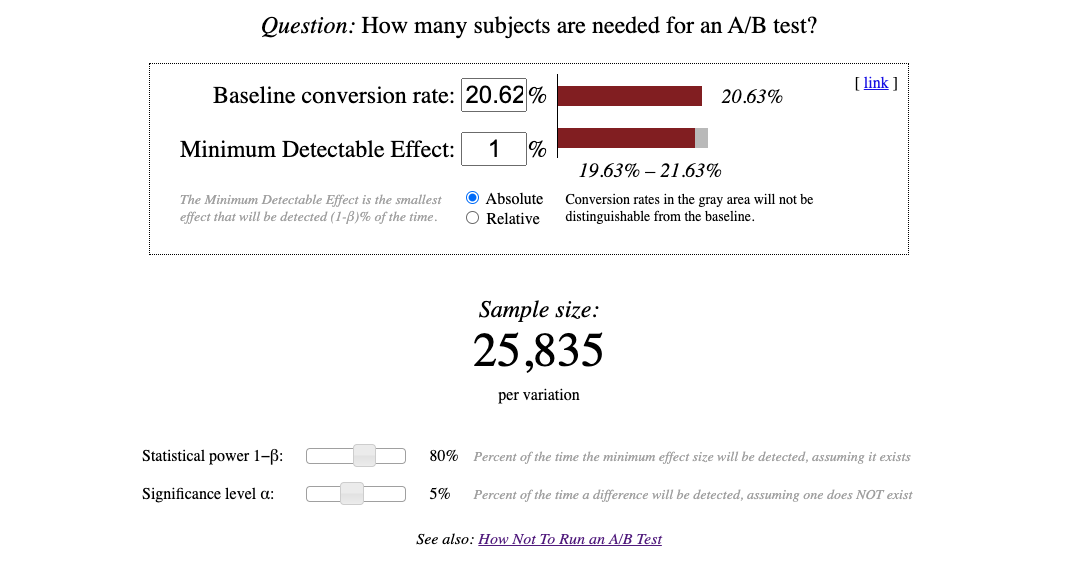

Because we need two groups and this is the number after scaled, we need to mutiply this number by 2 and scale back (divided by N)

You could also calculate using your own function as below

In [53]:
#storing alpha and beta in a dictionary
error_prob = {"alpha": 0.05, "beta": 0.20}
error_prob

{'alpha': 0.05, 'beta': 0.2}

In [54]:
#create new column n_c to store sample sizes
md["n_C"] = np.nan

#define function                              
def get_sampleSize (alpha, beta, p, dmin):
    '''Return sample size given alpha, beta, p and dmin'''
    return (pow((stats.norm.ppf(1-alpha/2)*(2*p*(1-p))**0.5+stats.norm.ppf(1-beta)*(p*(1-p)+(p+dmin)*(1-(p+dmin)))**0.5),2))/(pow(dmin,2))

#calculate sample sizes for evaluation metrics with defined adjustments and store results in md
for i in ["CG", "CN"]:
    md.at[i, "n_C"] = round((get_sampleSize(error_prob["alpha"], error_prob["beta"], md.loc[i]["Estimator"], md.loc[i]["dmin"])/md.loc["CTP"]["Estimator"])*2)

md.at["R", "n_C"] = round(((get_sampleSize(error_prob["alpha"], error_prob["beta"], md.loc["R"]["Estimator"], md.loc["R"]["dmin"])/md.loc["CTP"]["Estimator"])/md.loc["CG"]["Estimator"])*2)
md

,Metric Name,Estimator,dmin,N,SE,n_C
C,Cookies,40000.000000,3000.0000,5000.000000,NaN,NaN
CL,Clicks,3200.000000,240.0000,400.000000,NaN,NaN
ID,User-ids,660.000000,-50.0000,82.500000,NaN,NaN
CTP,Click-through-probability,0.080000,0.0100,0.010000,NaN,NaN
CG,Gross conversion,0.206250,-0.0100,0.025781,0.020231,638940.0
R,Retention,0.530000,0.0100,0.066250,0.054949,4737771.0
CN,Net conversion,0.109313,0.0075,0.013664,0.015602,685336.0


### Choosing experiment duration and exposure

Based on the number of pageviews calculated for each metric, we need 4737771 pageviews to test on all of three metrics. Given Udacity has approximately 40000 pageviews everyday, if we divert all of the pageviews, that would take 119 days to finish the test which is too long. However, to test on gross conversions and net conversions, we only need 685336 pageviews, which takes 17.13 days to finish the test. Therefore, I would recoomend dropping retention and use gross and net conversions for evaluation metrics. Since net conversion is the product of gross conversion and retention, it should work as effectively as retention. Assume we could divert 80% of the traffic on Udacity to test on the metrics, it needs about 21 days.

### Experiment Analysis

#### Sanity Checks

In [58]:
control = pd.read_excel(r'Final Project Results.xlsx',sheet_name = 'Control')

In [59]:
Exp = pd.read_excel(r'Final Project Results.xlsx',sheet_name = 'Experiment')

In [118]:
Sanity_Checks = pd.DataFrame(columns = ['metrics','SE','m','CI lower','CI upper','passed'],index=["C", "CL", "CTP"])
Sanity_Checks

,metrics,SE,m,CI lower,CI upper,passed
C,NaN,NaN,NaN,NaN,NaN,NaN
CL,NaN,NaN,NaN,NaN,NaN,NaN
CTP,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
#enter the invariants you want to test
metrics = ['Cookies','Clicks','Click Through Probability']
Sanity_Checks['metrics'] = metrics
Sanity_Checks

,metrics,SE,m,CI lower,CI upper,passed
C,Cookies,NaN,NaN,NaN,NaN,NaN
CL,Clicks,NaN,NaN,NaN,NaN,NaN
CTP,Click Through Probability,NaN,NaN,NaN,NaN,NaN


In [116]:
def pass_test(index,metrics,a=1.96,p=0.5):
    
    for i,j in zip(index,metrics):
        
        #calculate the total number
        n_total = control[j].sum() + Exp[j].sum()
        
        #calculate phat for each metric
        p_hat = control[j].sum()/n_total
        
        #calculate standard error for each metric
        Sanity_Checks.at[i,'SE'] = (p_hat*(1-p_hat)/n_total)**0.5
        
        #calculate margin of errors
        Sanity_Checks.at[i,'m'] = a*Sanity_Checks.at[i,'SE']
        
        #calculate confidence interval
        Sanity_Checks.at[i,'CI lower'] = p - Sanity_Checks.at[i,'m']
        Sanity_Checks.at[i,'CI upper'] = p + Sanity_Checks.at[i,'m']
        
        #check if phat falls in the condifence interval, if so, it passes the test
        if p_hat <= Sanity_Checks.at[i,'CI upper'] and p_hat >= Sanity_Checks.at[i,'CI lower']:
            Sanity_Checks.at[i,'passed'] = 'True'
        else:
            Sanity_Checks.at[i,'passed'] = 'False'
            
    return Sanity_Checks
     

In [120]:
index = ['C','CL']
metrics = ['Pageviews','Clicks']

pass_test(index,metrics,a,p)

,metrics,SE,m,CI lower,CI upper,passed
C,Cookies,0.000602,0.00118,0.49882,0.50118,True
CL,Clicks,0.0021,0.004116,0.495884,0.504116,True
CTP,Click Through Probability,NaN,NaN,NaN,NaN,NaN


In [129]:
def pass_test_prob(a=1.96,i='CTP',p=0):
    
    #calculate p control
    p_control = control['Clicks'].sum()/control['Pageviews'].sum()
    
    #calculate p experiment
    p_exp = Exp['Clicks'].sum()/Exp['Pageviews'].sum()
    
    #calculate observed difference
    obs = p_exp - p_control
    
    #calculate POOLED standard error 
    Sanity_Checks.at[i,'SE'] = (p_control*(1-p_control)/control['Pageviews'].sum() + p_exp*(1-p_exp)/Exp['Pageviews'].sum())**0.5
    
    #calculate margin of errors
    Sanity_Checks.at[i,'m'] = a*Sanity_Checks.at[i,'SE']
    
    #calculate confidence interval
    Sanity_Checks.at[i,'CI lower'] = p - Sanity_Checks.at[i,'m']
    Sanity_Checks.at[i,'CI upper'] = p + Sanity_Checks.at[i,'m']
    
    #check if phat falls in the condifence interval, if so, it passes the test
    if obs <= Sanity_Checks.at[i,'CI upper'] and obs >= Sanity_Checks.at[i,'CI lower']:
        Sanity_Checks.at[i,'passed'] = 'True'
    else:
        Sanity_Checks.at[i,'passed'] = 'False'
            
    return Sanity_Checks

In [130]:
pass_test_prob(a=1.96,i='CTP',p=0)

,metrics,SE,m,CI lower,CI upper,passed
C,Cookies,0.000602,0.00118,0.49882,0.50118,True
CL,Clicks,0.0021,0.004116,0.495884,0.504116,True
CTP,Click Through Probability,0.000661,0.001296,-0.001296,0.001296,True


### Result Analysis
#### Effect Size Tests
For the evaluation metrics, we will calculate the confidence interval for the difference between the control and experiment groups on 95% confidence interval, then check whether each metric is statically or practically significant.

A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)

Previously, we had chosen the Gross Conversion and Net Conversion as our final evaluation metrics to measure.

In [229]:
#create dataframe test_results
test_results = pd.DataFrame(columns=["CI lower", "CI upper",'SE','m','dmin'], index=["CG", "CN"])

#set up p_pooled

control = control.dropna()
Exp = Exp.dropna()

p_pooled = (control['Enrollments'].sum()+Exp['Enrollments'].sum())/(control['Clicks'].sum()+Exp['Clicks'].sum())
obs = Exp['Enrollments'].sum()/Exp['Clicks'].sum() - control['Enrollments'].sum()/control['Clicks'].sum()

def effect_size_tests(a = 1.96,i = i,obs = obs,p_pooled = p_pooled):
    
    #calculate POOLED standard error 
    test_results.at[i,'SE'] = (p_pooled*(1-p_pooled)*(1/control['Clicks'].sum()+1/Exp['Clicks'].sum()))**0.5
    
    #calculate margin of errors
    test_results.at[i,'m'] = a*test_results.at[i,'SE']
   
    #calculate confidence interval
    test_results.at[i,'CI lower'] = obs - test_results.at[i,'m']
    test_results.at[i,'CI upper'] = obs + test_results.at[i,'m']

    
    #import dmin from md
    test_results.at[i,'dmin'] = md.at[i,'dmin']
    
    #check if it is statistical significant
    
    if  test_results.at[i,'CI lower'] <= 0 <= test_results.at[i,'CI upper'] :
        test_results.at[i,'stat significant'] = 'False'
    else:
        test_results.at[i,'stat significant'] = 'True' 
   
    #check if it is practical significant
    if obs < test_results.at[i,'dmin']:
        if test_results.at[i,'dmin'] < test_results.at[i,'CI lower'] or test_results.at[i,'dmin'] > test_results.at[i,'CI upper']:
            test_results.at[i,'practical passed'] = 'True'
        else:
            test_results.at[i,'practical passed'] = 'False'
        
    return test_results
    

    

In [230]:
effect_size_tests(a = 1.96,i = 'CG',obs = obs,p_pooled = p_pooled)

,CI lower,CI upper,SE,m,dmin,stat significant,practical passed
CG,-0.029123,-0.011986,0.004372,0.008568,-0.01,True,True
CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
p_pooled_cn = (control['Payments'].sum()+Exp['Payments'].sum())/(control['Clicks'].sum()+Exp['Clicks'].sum())
obs_cn = Exp['Payments'].sum()/Exp['Clicks'].sum() - control['Payments'].sum()/control['Clicks'].sum()

effect_size_tests(a = 1.96,i = 'CN',obs = obs_cn,p_pooled = p_pooled_cn)

,CI lower,CI upper,SE,m,dmin,stat significant,practical passed
CG,-0.029123,-0.011986,0.004372,0.008568,-0.01,True,True
CN,-0.011605,0.001857,0.003434,0.006731,0.0075,False,True


Because the confidence interval does not include the practical significance boundary ,I can be confidence at 95% confidence level the true change is large enough to be worth launching.

### Sign Test


Since gross conversion and new conversion are not independent so we will skip sign test
<br>(if the metrics are independent, you could use this link to do the sign test
https://www.graphpad.com/quickcalcs/binomial1/)

### Recommendation
Our results show that the gross conversion will be siginificantly reduced. However, there's no significant change in net conversion. Therefore, the screener will help reduce the student enrollment, but not enough evidence to show that there will be more students who make the payments. I would not recommend launching the test now, a longer timeframe might be needed to do another test.


Reference: 
<br>https://www.kaggle.com/code/mariusmesserschmied/udacity-a-b-testing-final-course-project/notebook
<br>https://medium.com/@zhouyuchen999/a-b-testing-experiment-a-udacity-course-project-f958f7236278
